Importing Libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Loading Dataset

In [ ]:
df = pd.read_csv(r"C:\Users\hp\Downloads\ML Project\Car_Price (1).csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [154]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [156]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Checking NULLS

In [157]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [158]:
df['car_brand'] = df['name'].str.split(' ').str[0]
df.drop(['name'], axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

Univariate Analysis: Selling Price Distribution

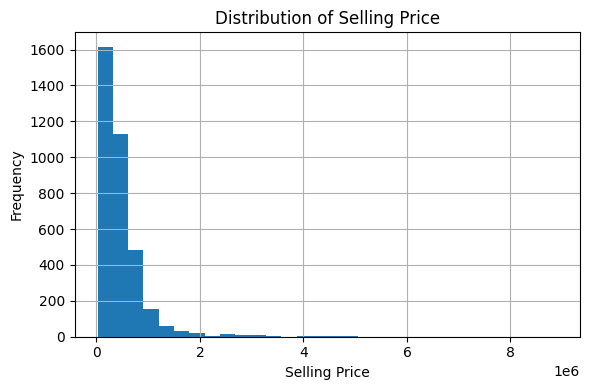

In [159]:
plt.figure(figsize=(6, 4))
df['selling_price'].hist(bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Count plots for categorical columns

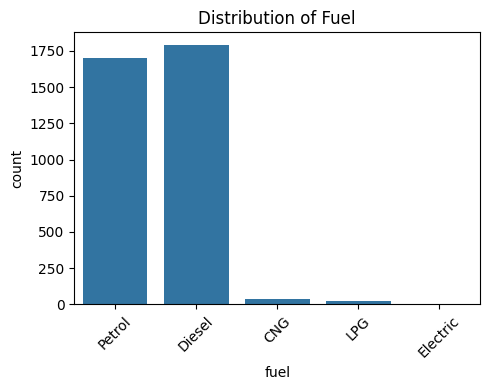

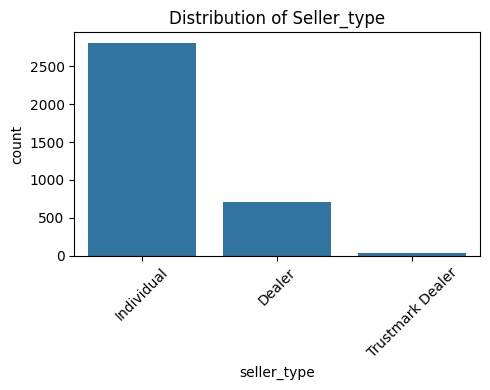

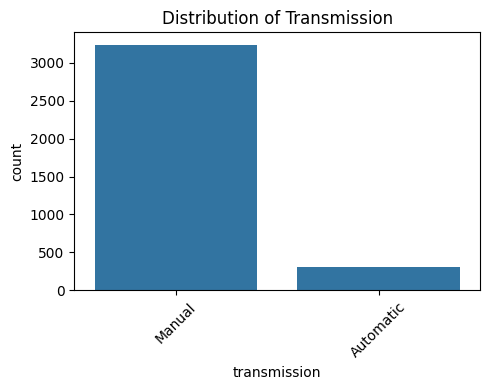

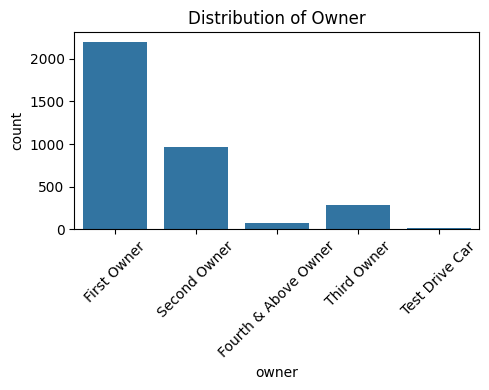

In [160]:
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Boxplots for numeric features

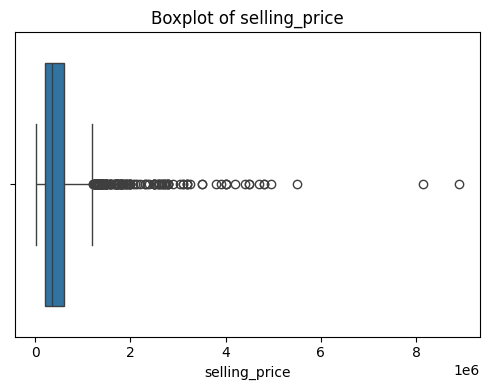

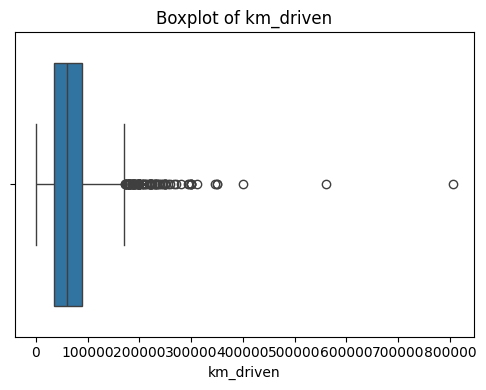

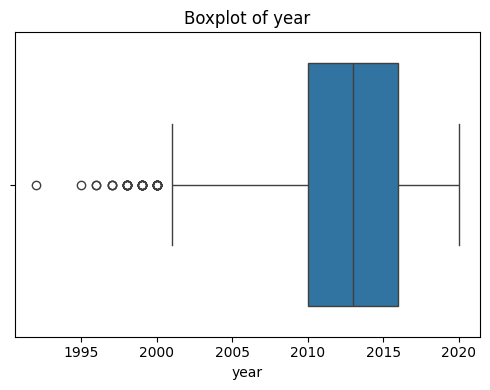

In [161]:
for col in ['selling_price', 'km_driven', 'year']:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

Bivariate: km_driven vs selling_price

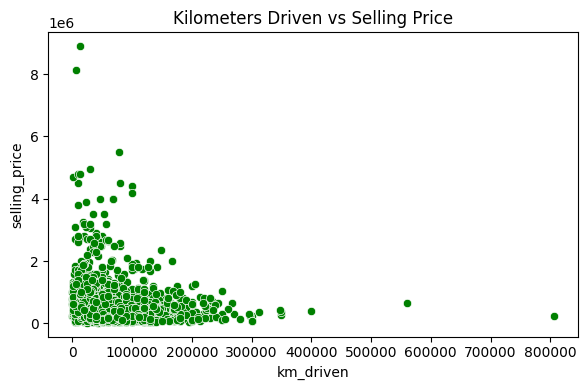

In [162]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='km_driven', y='selling_price', data=df,color='Green')
plt.title('Kilometers Driven vs Selling Price')
plt.tight_layout()
plt.show()

Multivariate Analysis

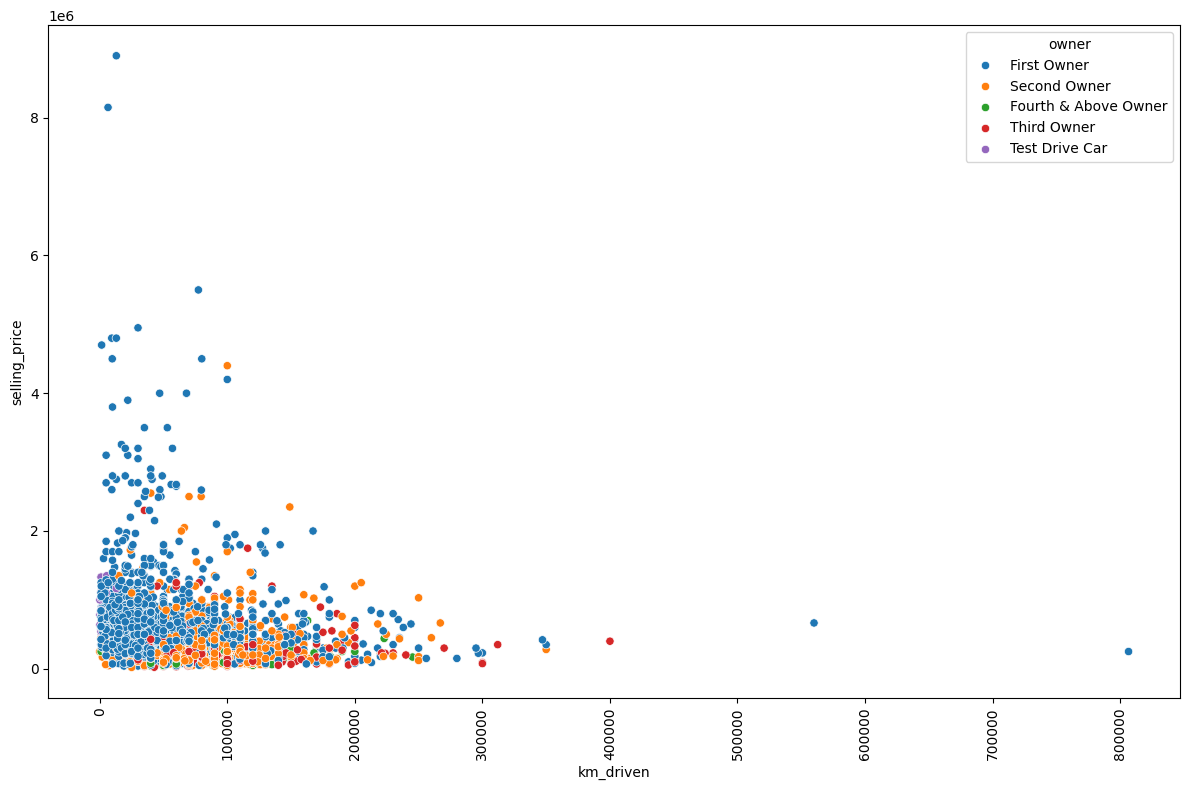

In [163]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='km_driven', y = 'selling_price', hue='owner')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

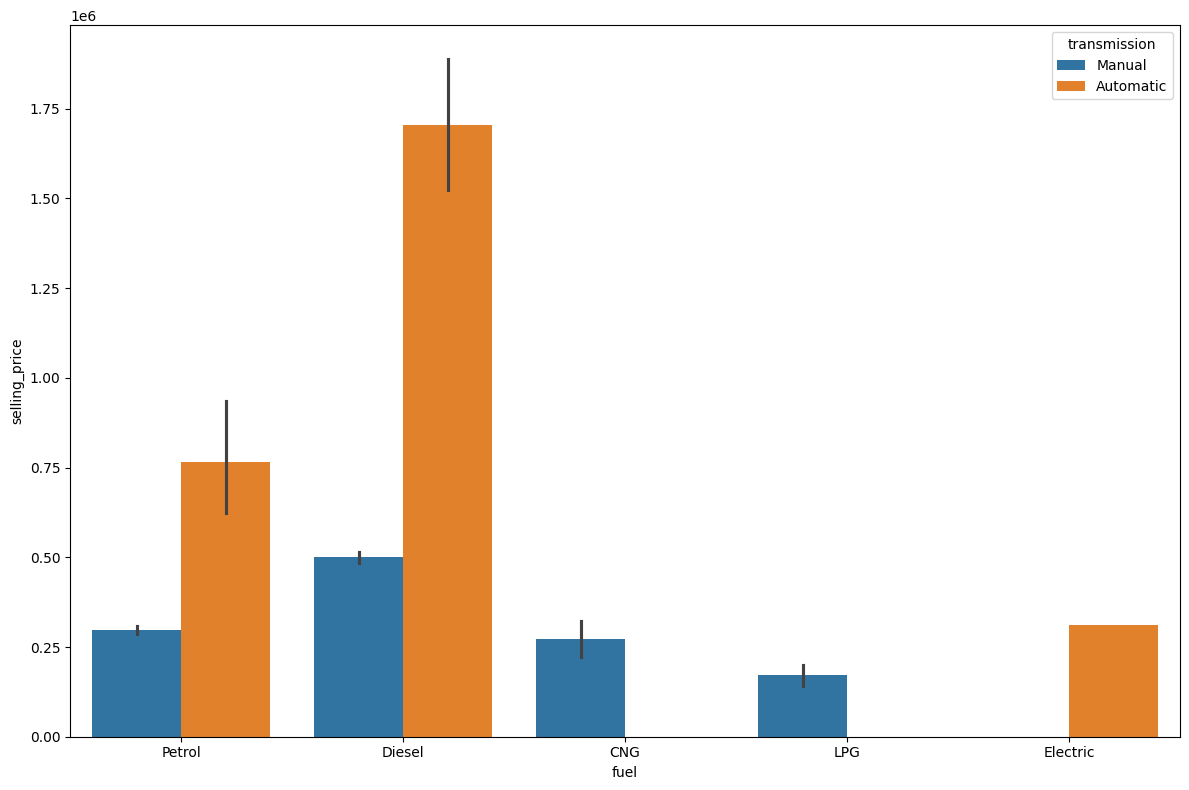

In [164]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='fuel', y = 'selling_price', hue='transmission')
plt.tight_layout()
plt.show()

Boxplot: Transmission vs Price with Seller Type

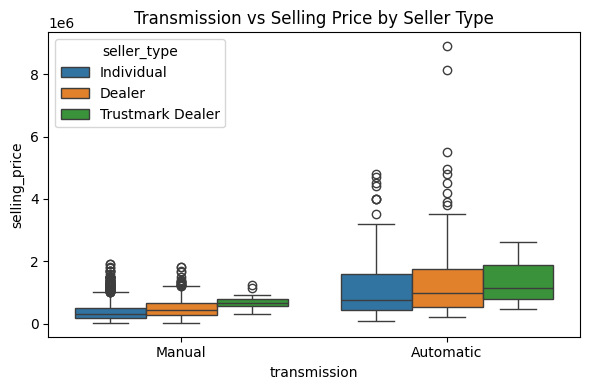

In [165]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='transmission', y='selling_price', hue='seller_type')
plt.title("Transmission vs Selling Price by Seller Type")
plt.tight_layout()
plt.show()

Correlation Heatmap

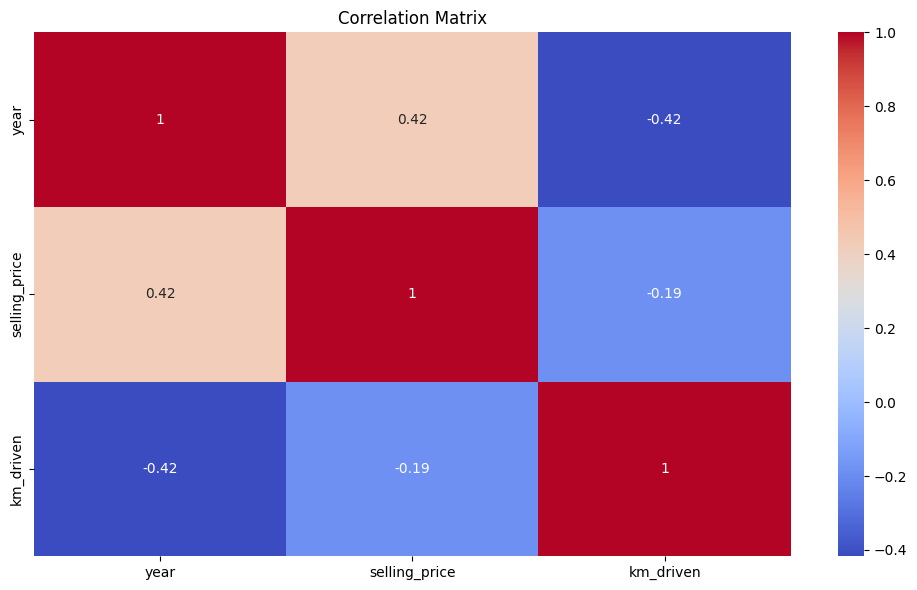

In [166]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Feature Engineering & Outlier Treatment

In [167]:
df['car_age'] = 2025 - df['year']
df = df[df['km_driven'] <= df['km_driven'].quantile(0.98)]
df = df[(df['year'] >= df['year'].quantile(0.01)) & (df['year'] <= df['year'].quantile(0.99))]
df['selling_price'] = np.log(df['selling_price'])
df['km_driven'] = np.sqrt(df['km_driven'])

One-Hot Encoding

In [168]:
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner', 'car_brand'], drop_first=True)
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

Split and scale data

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression

In [170]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

# Adjusted R²
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print metrics
print("R² Score (Train):", lr.score(X_train, y_train))
print("R² Score (Test):", r2)
print("Adjusted R² Score:", adjusted_r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


R² Score (Train): 0.7846993601688906
R² Score (Test): 0.7785665187209472
Adjusted R² Score: 0.7642364629216865
MAE: 0.30763503317687046
MSE: 0.15022697018883097
RMSE: 0.3875912411146967


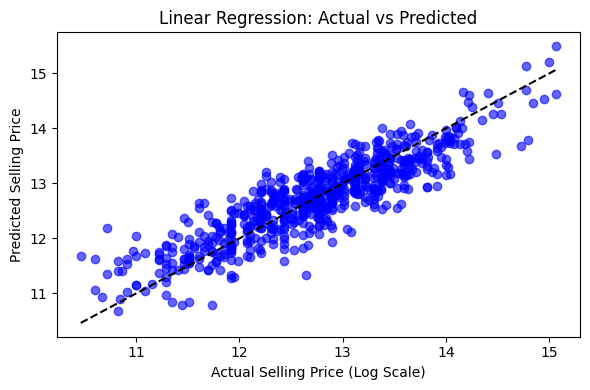

In [171]:
# 1. Linear Regression - Actual vs Predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Selling Price (Log Scale)')
plt.ylabel('Predicted Selling Price')
plt.tight_layout()
plt.show()

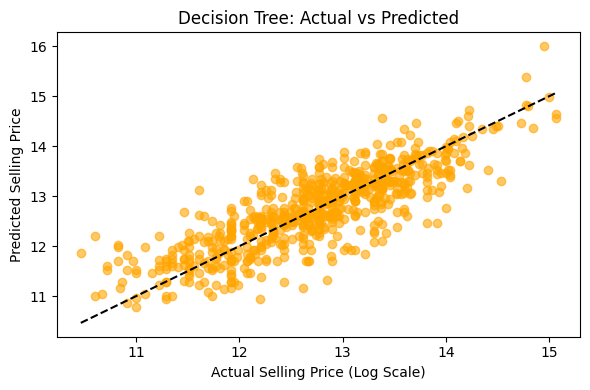

In [172]:
# 2. Decision Tree - Actual vs Predicted
y_pred_dt = dt.predict(X_test)
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual Selling Price (Log Scale)')
plt.ylabel('Predicted Selling Price')
plt.tight_layout()
plt.show()

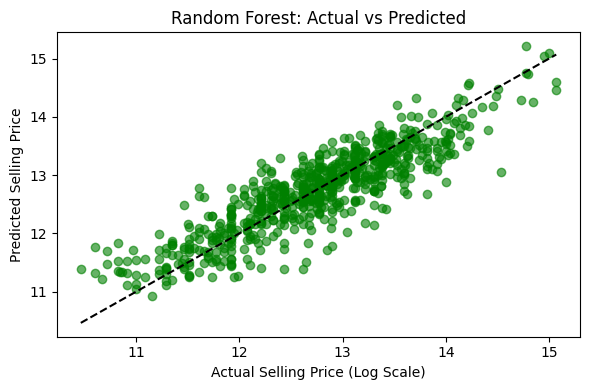

In [173]:
# 3. Random Forest - Actual vs Predicted
y_pred_rf = rf.predict(X_test)
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Selling Price (Log Scale)')
plt.ylabel('Predicted Selling Price')
plt.tight_layout()
plt.show()


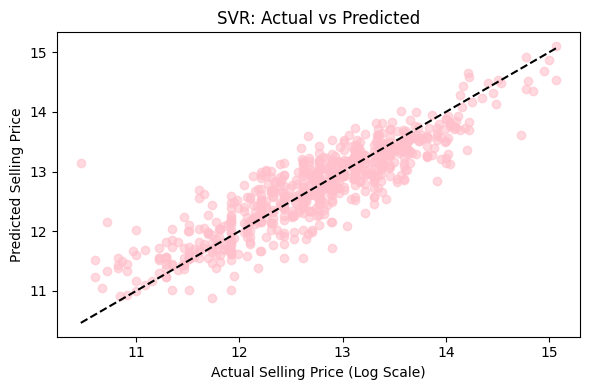

In [174]:
# 4. Support Vector Regressor (SVR) - Actual vs Predicted
y_pred_svr = svm.predict(X_test_scaled)
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_svr, color='pink', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Selling Price (Log Scale)')
plt.ylabel('Predicted Selling Price')
plt.tight_layout()
plt.show()

Decision Tree

In [175]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_dt = 1 - (1 - r2_dt) * (n - 1) / (n - p - 1)

print("Decision Tree Performance:")
print(f"R² Score: {r2_dt:.4f}")
print(f"Adjusted R²: {adjusted_r2_dt:.4f}")
print(f"MAE: {mae_dt:.4f}")
print(f"MSE: {mse_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")

Decision Tree Performance:
R² Score: 0.6630
Adjusted R²: 0.6412
MAE: 0.3668
MSE: 0.2286
RMSE: 0.4781


Random Forest

In [176]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
adjusted_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

print("Random Forest Performance:")
print(f"R² Score: {r2_rf:.4f}")
print(f"Adjusted R²: {adjusted_r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

Random Forest Performance:
R² Score: 0.7710
Adjusted R²: 0.7561
MAE: 0.3064
MSE: 0.1554
RMSE: 0.3942


Support Vector Regression

In [177]:
svm = SVR()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)
adjusted_r2_svm = 1 - (1 - r2_svm) * (n - 1) / (n - p - 1)

print("SVR Performance:")
print(f"R² Score: {r2_svm:.4f}")
print(f"Adjusted R²: {adjusted_r2_svm:.4f}")
print(f"MAE: {mae_svm:.4f}")
print(f"MSE: {mse_svm:.4f}")
print(f"RMSE: {rmse_svm:.4f}")



SVR Performance:
R² Score: 0.7861
Adjusted R²: 0.7723
MAE: 0.2880
MSE: 0.1451
RMSE: 0.3809


K Nearest Neighbour

In [178]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
adjusted_r2_knn = 1 - (1 - r2_knn) * (n - 1) / (n - p - 1)
mape_knn = np.mean(np.abs((np.exp(y_test) - np.exp(y_pred_knn)) / np.exp(y_test))) * 100
rmsle_knn = np.sqrt(np.mean((np.log1p(np.exp(y_test)) - np.log1p(np.exp(y_pred_knn)))**2))

print("KNN Performance:")
print(f"R² Score: {r2_knn:.4f}")
print(f"Adjusted R²: {adjusted_r2_knn:.4f}")
print(f"MAE: {mae_knn:.4f}")
print(f"MSE: {mse_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")

KNN Performance:
R² Score: 0.7628
Adjusted R²: 0.7474
MAE: 0.3146
MSE: 0.1610
RMSE: 0.4012


Cross Validation

In [179]:
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'SVR': svm, 'KNN': knn}
for name, model in models.items():
    if name in ['SVR', 'KNN']:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Score: {scores.mean():.4f}")

Linear Regression Cross-Validation Score: 0.7735
Decision Tree Cross-Validation Score: 0.5803
Random Forest Cross-Validation Score: 0.7386
SVR Cross-Validation Score: 0.7760
KNN Cross-Validation Score: 0.7252


Conclusion :
 Based on the performance metrics and cross-validation scores from our machine learning models, **Support Vector Regression (SVR)** emerged as the best-performing algorithm with the highest cross-validation score of **0.7760**, indicating strong generalization and predictive capability. **Linear Regression** followed closely with a cross-validation score of **0.7735**, offering nearly comparable performance with the added advantage of simplicity and interpretability, making it a solid baseline model. **Random Forest Regressor** performed well too with a score of **0.7386**, benefiting from its ability to handle non-linear relationships and outliers but slightly lagging behind SVR and Linear Regression. **K-Nearest Neighbors (KNN)** achieved a cross-validation score of **0.7252**, showing acceptable performance, though it's more sensitive to scaling and computationally intensive on larger datasets. On the other hand, the **Decision Tree Regressor** had the lowest cross-validation score of **0.5803**, highlighting its tendency to overfit and limited generalization unless tuned or used in an ensemble. Overall, **SVR is recommended for best accuracy**, **Linear Regression for interpretability**, and **Random Forest** for a balance between robustness and performance, while **Decision Tree** should be avoided unless improved through tuning.